## "Good" and "Bad" Days

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from fancyimpute import KNN  

In [2]:
#Read the dataset for the active pilot users
df = pd.read_csv("patients/sunepeis.csv", low_memory=False).drop(columns = ['Unnamed: 0'])

#Make DATE in datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d').dt.date

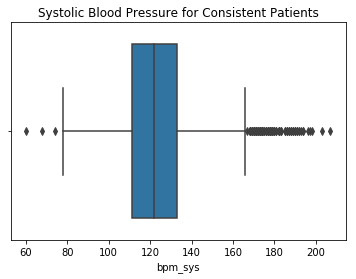

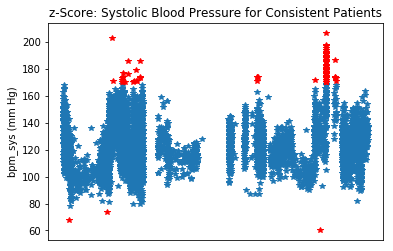

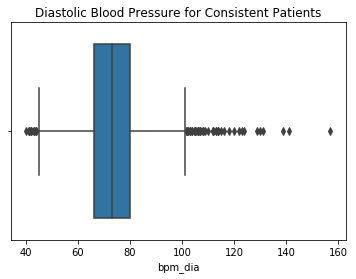

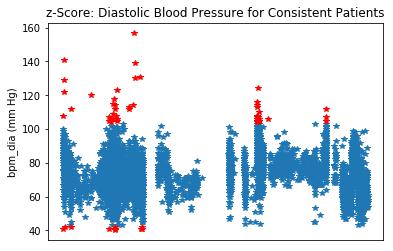

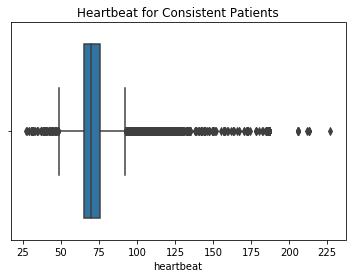

40.72117804095877


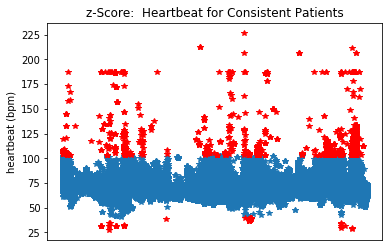

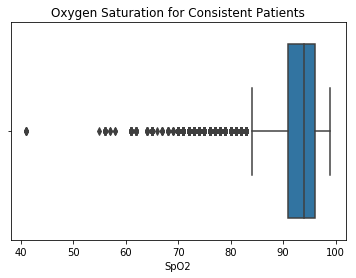

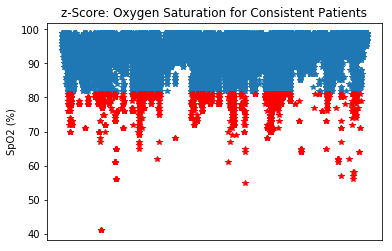

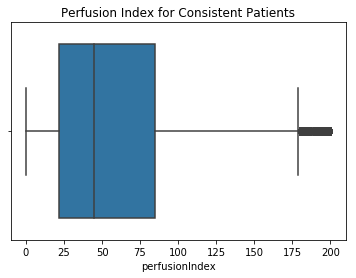

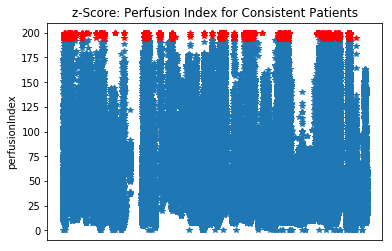

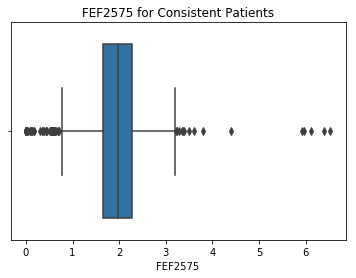

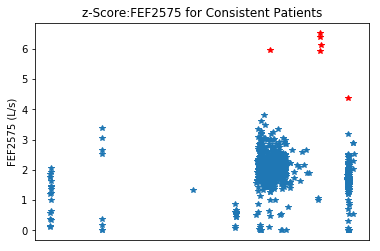

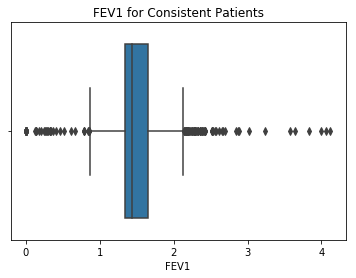

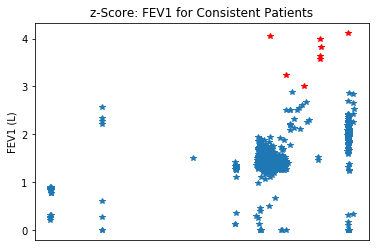

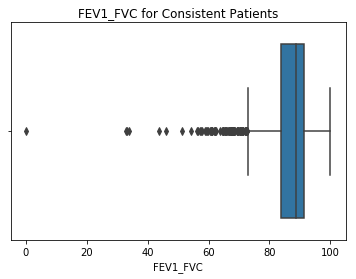

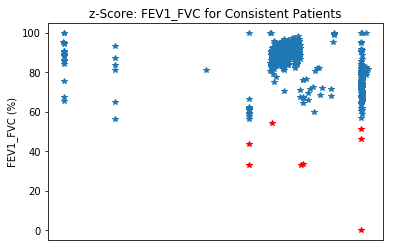

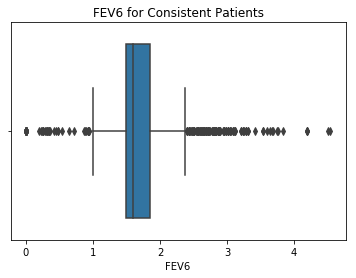

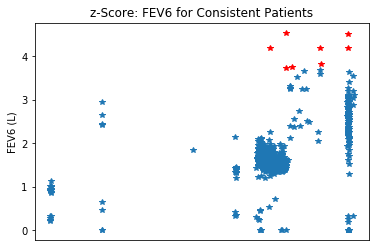

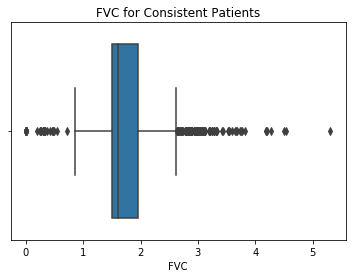

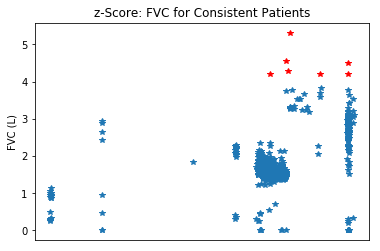

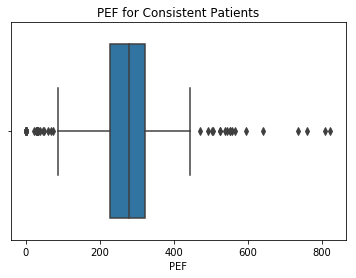

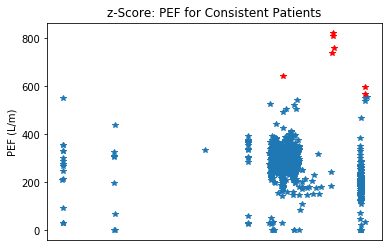

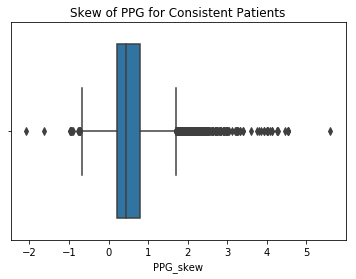

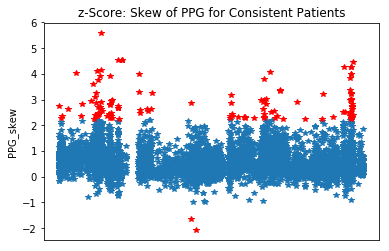

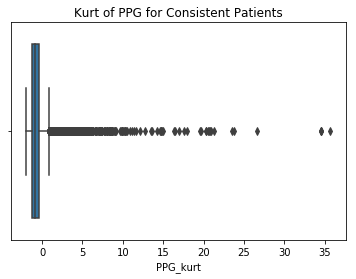

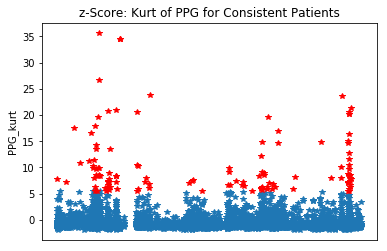

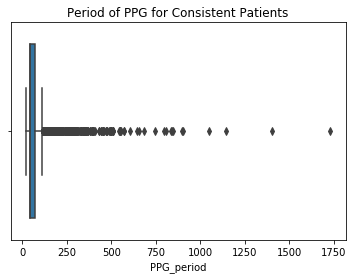

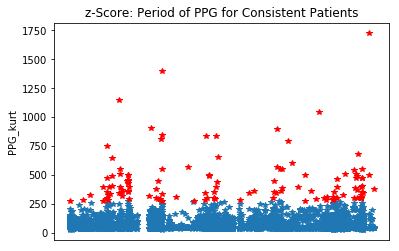

In [3]:
#Discover outliers with visualization tools and z-score > 3

dfn = df.drop(columns=['PATIENT_CODE', 'TIME', 'CATEGORY', 'GENDER', 'AGE', 'DATE', 'PPG', 'PPG_united'])

#bpm systolic
plt.rcParams.update({'font.size': 10})
sns_boxplot = sns.boxplot(x=df['bpm_sys'])
sns_boxplot.set_title('Systolic Blood Pressure for Consistent Patients', fontsize=12)
sns_boxplot.figure.savefig('patients/outliers_good_bad_days/Systolic_Blood_Pressure.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['bpm_sys'] - dfn['bpm_sys'].mean())/dfn['bpm_sys'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['bpm_sys'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['bpm_sys'], "*", c='r')
plt.title('z-Score: Systolic Blood Pressure for Consistent Patients', fontsize=12)
plt.ylabel('bpm_sys (mm Hg)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/Systolic_Blood_Pressure2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_bpm_sys = (3 * dfn['bpm_sys'].std(ddof=0)) + dfn['bpm_sys'].mean()
min_bpm_sys = (-3 * dfn['bpm_sys'].std(ddof=0)) + dfn['bpm_sys'].mean()

#bpm diastolic
sns_boxplot2 = sns.boxplot(x=df['bpm_dia'])
sns_boxplot2.set_title('Diastolic Blood Pressure for Consistent Patients', fontsize=12)
sns_boxplot2.figure.savefig('patients/outliers_good_bad_days/Diastolic_Blood_Pressure.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['bpm_dia'] - dfn['bpm_dia'].mean())/dfn['bpm_dia'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['bpm_dia'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['bpm_dia'], "*", c='r')
plt.title('z-Score: Diastolic Blood Pressure for Consistent Patients', fontsize=12)
plt.ylabel('bpm_dia (mm Hg)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/Diastolic_Blood_Pressure2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_bpm_dia = (3 * dfn['bpm_dia'].std(ddof=0)) + dfn['bpm_dia'].mean()
min_bpm_dia = (-3 * dfn['bpm_dia'].std(ddof=0)) + dfn['bpm_dia'].mean()

#heartbeat
sns_boxplot3 = sns.boxplot(x=df['heartbeat'])
sns_boxplot3.set_title('Heartbeat for Consistent Patients', fontsize=12)
sns_boxplot3.figure.savefig('patients/outliers_good_bad_days/Heartbeat.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['heartbeat'] - dfn['heartbeat'].mean())/dfn['heartbeat'].std(ddof=0)
print (-3 * dfn['heartbeat'].std(ddof=0)) + dfn['heartbeat'].mean()
plt.plot(df[np.abs(dfn['zscore']) <= 3]['heartbeat'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['heartbeat'], "*", c='r')
plt.title('z-Score:  Heartbeat for Consistent Patients', fontsize=12)
plt.ylabel('heartbeat (bpm)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/Heartbeat2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_heartbeat = (3 * dfn['heartbeat'].std(ddof=0)) + dfn['heartbeat'].mean()
min_heartbeat = (-3 * dfn['heartbeat'].std(ddof=0)) + dfn['heartbeat'].mean()

#SpO2
sns_boxplot4 = sns.boxplot(x=df['SpO2'])
sns_boxplot4.set_title('Oxygen Saturation for Consistent Patients', fontsize=12)
sns_boxplot4.figure.savefig('patients/outliers_good_bad_days/Oxygen_Saturation.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['SpO2'] - dfn['SpO2'].mean())/dfn['SpO2'].std(ddof=0)
(-3 * dfn['SpO2'].std(ddof=0)) + dfn['SpO2'].mean()
plt.plot(df[np.abs(dfn['zscore']) <= 3]['SpO2'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['SpO2'], "*", c='r')
plt.title('z-Score: Oxygen Saturation for Consistent Patients', fontsize=12)
plt.ylabel('SpO2 (%)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/Oxygen_Saturation2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_SpO2 = (3 * dfn['SpO2'].std(ddof=0)) + dfn['SpO2'].mean()
min_SpO2 = (-3 * dfn['SpO2'].std(ddof=0)) + dfn['SpO2'].mean()

#perfusionIndex
sns_boxplot5 = sns.boxplot(x=df['perfusionIndex'])
sns_boxplot5.set_title('Perfusion Index for Consistent Patients', fontsize=12)
sns_boxplot5.figure.savefig('patients/outliers_good_bad_days/Perfusion_Index.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['perfusionIndex'] - dfn['perfusionIndex'].mean())/dfn['perfusionIndex'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['perfusionIndex'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['perfusionIndex'], "*", c='r')
plt.title('z-Score: Perfusion Index for Consistent Patients', fontsize=12)
plt.ylabel('perfusionIndex')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/Perfusion_Index2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_perfusionIndex = (3 * dfn['perfusionIndex'].std(ddof=0)) + dfn['perfusionIndex'].mean()
min_perfusionIndex = (-3 * dfn['perfusionIndex'].std(ddof=0)) + dfn['perfusionIndex'].mean()

#FEF2575
sns_boxplot6 = sns.boxplot(x=df['FEF2575'])
sns_boxplot6.set_title('FEF2575 for Consistent Patients', fontsize=12)
sns_boxplot6.figure.savefig('patients/outliers_good_bad_days/FEF2575.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['FEF2575'] - dfn['FEF2575'].mean())/dfn['FEF2575'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['FEF2575'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['FEF2575'], "*", c='r')
plt.title('z-Score:FEF2575 for Consistent Patients', fontsize=12)
plt.ylabel('FEF2575 (L/s)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/FEF25752.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_FEF2575 = (3 * dfn['FEF2575'].std(ddof=0)) + dfn['FEF2575'].mean()
min_FEF2575 = (-3 * dfn['FEF2575'].std(ddof=0)) + dfn['FEF2575'].mean()

#FEV1
sns_boxplot7 = sns.boxplot(x=df['FEV1'])
sns_boxplot7.set_title('FEV1 for Consistent Patients', fontsize=12)
sns_boxplot7.figure.savefig('patients/outliers_good_bad_days/FEV1.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['FEV1'] - dfn['FEV1'].mean())/dfn['FEV1'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['FEV1'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['FEV1'], "*", c='r')
plt.title('z-Score: FEV1 for Consistent Patients', fontsize=12)
plt.ylabel('FEV1 (L)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/FEV12.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_FEV1 = (3 * dfn['FEV1'].std(ddof=0)) + dfn['FEV1'].mean()
min_FEV1 = (-3 * dfn['FEV1'].std(ddof=0)) + dfn['FEV1'].mean()

#FEV1_FVC
sns_boxplot8 = sns.boxplot(x=df['FEV1_FVC'])
sns_boxplot8.set_title('FEV1_FVC for Consistent Patients', fontsize=12)
sns_boxplot8.figure.savefig('patients/outliers_good_bad_days/FEV1_FVC.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['FEV1_FVC'] - dfn['FEV1_FVC'].mean())/dfn['FEV1_FVC'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['FEV1_FVC'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['FEV1_FVC'], "*", c='r')
plt.title('z-Score: FEV1_FVC for Consistent Patients', fontsize=12)
plt.ylabel('FEV1_FVC (%)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/FEV1_FVC2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_FEV1_FVC = (3 * dfn['FEV1_FVC'].std(ddof=0)) + dfn['FEV1_FVC'].mean()
min_FEV1_FVC = (-3 * dfn['FEV1_FVC'].std(ddof=0)) + dfn['FEV1_FVC'].mean()

#FEV6
sns_boxplot9 = sns.boxplot(x=df['FEV6'])
sns_boxplot9.set_title('FEV6 for Consistent Patients', fontsize=12)
sns_boxplot9.figure.savefig('patients/outliers_good_bad_days/FEV6.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['FEV6'] - dfn['FEV6'].mean())/dfn['FEV6'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['FEV6'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['FEV6'], "*", c='r')
plt.title('z-Score: FEV6 for Consistent Patients', fontsize=12)
plt.ylabel('FEV6 (L)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/FEV62.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_FEV6 = (3 * dfn['FEV6'].std(ddof=0)) + dfn['FEV6'].mean()
min_FEV6 = (-3 * dfn['FEV6'].std(ddof=0)) + dfn['FEV6'].mean()

#FVC
sns_boxplot10 = sns.boxplot(x=df['FVC'])
sns_boxplot10.set_title('FVC for Consistent Patients', fontsize=12)
sns_boxplot10.figure.savefig('patients/outliers_good_bad_days/FVC.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['FVC'] - dfn['FVC'].mean())/dfn['FVC'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['FVC'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['FVC'], "*", c='r')
plt.title('z-Score: FVC for Consistent Patients', fontsize=12)
plt.ylabel('FVC (L)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/FVC2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_FVC = (3 * dfn['FVC'].std(ddof=0)) + dfn['FVC'].mean()
min_FVC = (-3 * dfn['FVC'].std(ddof=0)) + dfn['FVC'].mean()

#PEF
sns_boxplot11 = sns.boxplot(x=df['PEF'])
sns_boxplot11.set_title('PEF for Consistent Patients', fontsize=12)
sns_boxplot11.figure.savefig('patients/outliers_good_bad_days/PEF.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['PEF'] - dfn['PEF'].mean())/dfn['PEF'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['PEF'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['PEF'], "*", c='r')
plt.title('z-Score: PEF for Consistent Patients', fontsize=12)
plt.ylabel('PEF (L/m)')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/PEF2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_PEF = (3 * dfn['PEF'].std(ddof=0)) + dfn['PEF'].mean()
min_PEF = (-3 * dfn['PEF'].std(ddof=0)) + dfn['PEF'].mean()


#PPG_skew
sns_boxplot12 = sns.boxplot(x=df['PPG_skew'])
sns_boxplot12.set_title('Skew of PPG for Consistent Patients', fontsize=12)
sns_boxplot12.figure.savefig('patients/outliers_good_bad_days/PPG_skew.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['PPG_skew'] - dfn['PPG_skew'].mean())/dfn['PPG_skew'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['PPG_skew'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['PPG_skew'], "*", c='r')
plt.title('z-Score: Skew of PPG for Consistent Patients', fontsize=12)
plt.ylabel('PPG_skew')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/PPG_skew2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_PPG_skew = (3 * dfn['PPG_skew'].std(ddof=0)) + dfn['PPG_skew'].mean()
min_PPG_skew = (-3 * dfn['PPG_skew'].std(ddof=0)) + dfn['PPG_skew'].mean()

#PPG_kurt
sns_boxplot13 = sns.boxplot(x=df['PPG_kurt'])
sns_boxplot13.set_title('Kurt of PPG for Consistent Patients', fontsize=12)
sns_boxplot13.figure.savefig('patients/outliers_good_bad_days/PPG_kurt.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['PPG_kurt'] - dfn['PPG_kurt'].mean())/dfn['PPG_kurt'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['PPG_kurt'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['PPG_kurt'], "*", c='r')
plt.title('z-Score: Kurt of PPG for Consistent Patients', fontsize=12)
plt.ylabel('PPG_kurt')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/PPG_kurt2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_PPG_kurt = (3 * dfn['PPG_kurt'].std(ddof=0)) + dfn['PPG_kurt'].mean()
min_PPG_kurt = (-3 * dfn['PPG_kurt'].std(ddof=0)) + dfn['PPG_kurt'].mean()

#PPG_period
sns_boxplot13 = sns.boxplot(x=df['PPG_period'])
sns_boxplot13.set_title('Period of PPG for Consistent Patients', fontsize=12)
sns_boxplot13.figure.savefig('patients/outliers_good_bad_days/PPG_period.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

dfn['zscore'] = (dfn['PPG_period'] - dfn['PPG_period'].mean())/dfn['PPG_period'].std(ddof=0)
plt.plot(df[np.abs(dfn['zscore']) <= 3]['PPG_period'], "*")
plt.plot(df[np.abs(dfn['zscore']) > 3]['PPG_period'], "*", c='r')
plt.title('z-Score: Period of PPG for Consistent Patients', fontsize=12)
plt.ylabel('PPG_kurt')
plt.xticks([])
plt.savefig('patients/outliers_good_bad_days/PPG_period2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

max_PPG_period = (3 * dfn['PPG_period'].std(ddof=0)) + dfn['PPG_period'].mean()
min_PPG_period = (-3 * dfn['PPG_period'].std(ddof=0)) + dfn['PPG_period'].mean()

In [4]:
'''
#Chauvenet's criterion
from scipy.special import erfc

criterion = 1.0/(2*len(dfn['bpm_sys']))        # Chauvenet's criterion
d = abs(dfn['bpm_sys']-dfn['bpm_sys'].mean())/dfn['bpm_sys'].std()         # Distance of a value to mean in stdv's
d /= 2**0.5                # The left and right tail threshold values
prob = erfc(d)               # Area normal dist.    
filter = prob >= criterion   # The 'accept' filter array with booleans
print filter 
plt.plot(df[filter == True]['bpm_sys'] , "*")
plt.plot(df[filter == False]['bpm_sys'], "*", c='r')
plt.title('Chauvenet criterion for Systolic Blood Pressure for frequent user pilots', fontsize=12)
plt.ylabel('bpm_sys (mm Hg)')
plt.xticks([])
plt.savefig('patients/correlation/Systolic_Blood_Pressure2.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()
'''

'\n#Chauvenet\'s criterion\nfrom scipy.special import erfc\n\ncriterion = 1.0/(2*len(dfn[\'bpm_sys\']))        # Chauvenet\'s criterion\nd = abs(dfn[\'bpm_sys\']-dfn[\'bpm_sys\'].mean())/dfn[\'bpm_sys\'].std()         # Distance of a value to mean in stdv\'s\nd /= 2**0.5                # The left and right tail threshold values\nprob = erfc(d)               # Area normal dist.    \nfilter = prob >= criterion   # The \'accept\' filter array with booleans\nprint filter \nplt.plot(df[filter == True][\'bpm_sys\'] , "*")\nplt.plot(df[filter == False][\'bpm_sys\'], "*", c=\'r\')\nplt.title(\'Chauvenet criterion for Systolic Blood Pressure for frequent user pilots\', fontsize=12)\nplt.ylabel(\'bpm_sys (mm Hg)\')\nplt.xticks([])\nplt.savefig(\'patients/correlation/Systolic_Blood_Pressure2.svg\', format=\'svg\', dpi=600, bbox_inches = "tight")\nplt.show()\n'

In [5]:
#Remove possible outliers
print len(df[df['bpm_sys'] > max_bpm_sys]) + len(df[df['bpm_sys'] < min_bpm_sys]), 'bpm_sys values out of', len(df[df['bpm_sys'].notna()]), 'total bpm_sys values are outliers'
print 'max_bpm_sys=', max_bpm_sys
print 'min_bpm_sys=', min_bpm_sys
df.loc[df['bpm_sys'] > max_bpm_sys,'bpm_sys'] = np.nan
df.loc[df['bpm_sys'] < min_bpm_sys,'bpm_sys'] = np.nan

print len(df[df['bpm_dia'] > max_bpm_dia]) + len(df[df['bpm_dia'] < min_bpm_dia]), 'bpm_dia values out of', len(df[df['bpm_dia'].notna()]), 'total bpm_dia values are outliers'
df.loc[df['bpm_dia'] > max_bpm_dia,'bpm_dia'] = np.nan
df.loc[df['bpm_dia'] < min_bpm_dia,'bpm_dia'] = np.nan
print 'max_bpm_dia=', max_bpm_dia
print 'min_bpm_dia=', min_bpm_dia

print len(df[df['heartbeat'] > max_heartbeat]) + len(df[df['heartbeat'] < min_heartbeat]), 'heartbeat values out of', len(df[df['heartbeat'].notna()]), 'total heartbeat values are outliers'
df.loc[df['heartbeat'] > max_heartbeat,'heartbeat'] = np.nan
df.loc[df['heartbeat'] < min_heartbeat,'heartbeat'] = np.nan
print 'max_heartbeat=', max_heartbeat
print 'min_heartbeat=', min_heartbeat

print len(df[df['SpO2'] > max_SpO2]) + len(df[df['SpO2'] < min_SpO2]), 'SpO2 values out of', len(df[df['SpO2'].notna()]), 'total SpO2 values are outliers'
df.loc[df['SpO2'] > max_SpO2,'SpO2'] = np.nan
df.loc[df['SpO2'] < min_SpO2,'SpO2'] = np.nan
print 'max_SpO2=', max_SpO2
print 'min_SpO2=', min_SpO2

print len(df[df['perfusionIndex'] > max_perfusionIndex]) + len(df[df['perfusionIndex'] < min_perfusionIndex]), 'perfusionIndex values out of', len(df[df['perfusionIndex'].notna()]), 'total perfusionIndex values are outliers'
df.loc[df['perfusionIndex'] > max_perfusionIndex,'perfusionIndex'] = np.nan
df.loc[df['perfusionIndex'] < min_perfusionIndex,'perfusionIndex'] = np.nan
print 'max_perfusionIndex=', max_perfusionIndex
print 'min_perfusionIndex=', min_perfusionIndex

print len(df[df['FEF2575'] > max_FEF2575]) + len(df[df['FEF2575'] < min_FEF2575]), 'FEF2575 values out of', len(df[df['FEF2575'].notna()]), 'total FEF2575 values are outliers'
df.loc[df['FEF2575'] > max_FEF2575, 'FEF2575'] = np.nan
df.loc[df['FEF2575'] < min_FEF2575, 'FEF2575'] = np.nan
print 'max_FEF2575=', max_FEF2575
print 'min_FEF2575=', min_FEF2575

print len(df[df['FEV1'] > max_FEV1]) + len(df[df['FEV1'] < min_FEV1]), 'FEV1 values out of', len(df[df['FEV1'].notna()]), 'total FEV1 values are outliers'
df.loc[df['FEV1'] > max_FEV1, 'FEV1'] = np.nan
df.loc[df['FEV1'] < min_FEV1, 'FEV1'] = np.nan
print 'max_FEV1=', max_FEV1
print 'min_FEV1=', min_FEV1

print len(df[df['FEV1_FVC'] > max_FEV1_FVC]) + len(df[df['FEV1_FVC'] < min_FEV1_FVC]), 'FEV1_FVC values out of', len(df[df['FEV1_FVC'].notna()]), 'total FEV1_FVC values are outliers'
df.loc[df['FEV1_FVC'] > max_FEV1_FVC, 'FEV1_FVC'] = np.nan
df.loc[df['FEV1_FVC'] < min_FEV1_FVC, 'FEV1_FVC'] = np.nan
print 'max_FEV1_FVC=', max_FEV1_FVC
print 'min_FEV1_FVC=', min_FEV1_FVC

print len(df[df['FEV6'] > max_FEV6]) + len(df[df['FEV6'] < min_FEV6]), 'FEV6 values out of', len(df[df['FEV6'].notna()]), 'total FEV6 values are outliers'
df.loc[df['FEV6'] > max_FEV6, 'FEV6'] = np.nan
df.loc[df['FEV6'] < min_FEV6, 'FEV6'] = np.nan
print 'max_FEV6=', max_FEV6
print 'min_FEV6=', min_FEV6

print len(df[df['FVC'] > max_FVC]) + len(df[df['FVC'] < min_FVC]), 'FVC values out of', len(df[df['FVC'].notna()]), 'total FVC values are outliers'
df.loc[df['FVC'] > max_FVC, 'FVC'] = np.nan
df.loc[df['FVC'] < min_FVC, 'FVC'] = np.nan
print 'max_FVC=', max_FVC
print 'min_FVC=', min_FVC

print len(df[df['PEF'] > max_PEF]) + len(df[df['PEF'] < min_PEF]), 'PEF values out of', len(df[df['PEF'].notna()]), 'total PEF values are outliers'
df.loc[df['PEF'] > max_PEF, 'PEF'] = np.nan
df.loc[df['PEF'] < min_PEF, 'PEF'] = np.nan
print 'max_PEF=', max_PEF
print 'min_PEF=', min_PEF

print len(df[df['PPG_skew'] > max_PPG_skew]) + len(df[df['PPG_skew'] < min_PPG_skew]), 'PPG_skew values out of', len(df[df['PPG_skew'].notna()]), 'total PPG_skew values are outliers'
df.loc[df['PPG_skew'] > max_PPG_skew, 'PPG_skew'] = np.nan
df.loc[df['PPG_skew'] < min_PPG_skew, 'PPG_skew'] = np.nan
print 'max_PPG_skew=', max_PPG_skew
print 'min_PPG_skew=', min_PPG_skew

print len(df[df['PPG_kurt'] > max_PPG_kurt]) + len(df[df['PPG_kurt'] < min_PPG_kurt]), 'PPG_kurt values out of', len(df[df['PPG_kurt'].notna()]), 'total PPG_kurt values are outliers'
df.loc[df['PPG_kurt'] > max_PPG_kurt, 'PPG_kurt'] = np.nan
df.loc[df['PPG_kurt'] < min_PPG_kurt, 'PPG_kurt'] = np.nan
print 'max_PPG_kurt=', max_PPG_kurt
print 'min_PPG_kurt=', min_PPG_kurt

print len(df[df['PPG_period'] > max_PPG_period]) + len(df[df['PPG_period'] < min_PPG_period]), 'PPG_period values out of', len(df[df['PPG_period'].notna()]), 'total PPG_period values are outliers'
df.loc[df['PPG_period'] > max_PPG_period, 'PPG_period'] = np.nan
df.loc[df['PPG_period'] < min_PPG_period, 'PPG_period'] = np.nan
print 'max_PPG_period=', max_PPG_period
print 'min_PPG_period=', min_PPG_period

df = df.dropna(thresh=7)

107 bpm_sys values out of 11110 total bpm_sys values are outliers
max_bpm_sys= 169.66443363251238
min_bpm_sys= 75.9213449453454
61 bpm_dia values out of 11110 total bpm_dia values are outliers
max_bpm_dia= 103.72519977771353
min_bpm_dia= 42.76228897116135
2166 heartbeat values out of 190771 total heartbeat values are outliers
max_heartbeat= 102.98309566940603
min_heartbeat= 40.72117804095877
2851 SpO2 values out of 180672 total SpO2 values are outliers
max_SpO2= 105.43029694105249
min_SpO2= 81.18459634623053
1840 perfusionIndex values out of 158425 total perfusionIndex values are outliers
max_perfusionIndex= 193.43070643268345
min_perfusionIndex= -76.37830939938692
6 FEF2575 values out of 758 total FEF2575 values are outliers
max_FEF2575= 4.114446817583305
min_FEF2575= -0.24141251679174913
8 FEV1 values out of 758 total FEV1 values are outliers
max_FEV1= 3.0147001693186137
min_FEV1= -0.00026745164051411585
8 FEV1_FVC values out of 748 total FEV1_FVC values are outliers
max_FEV1_FVC= 11

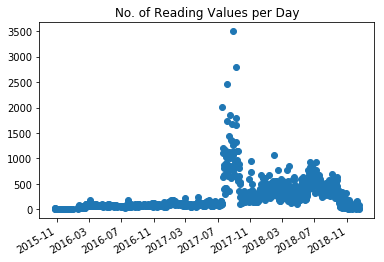

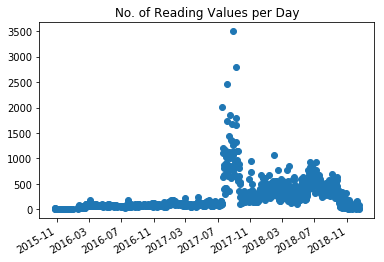

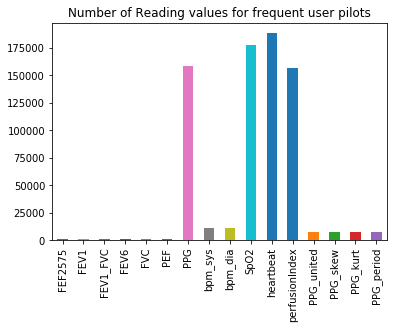

PATIENT_CODE           0
CATEGORY               0
GENDER                 0
AGE                    0
DATE                   0
TIME                   0
FEF2575           267320
FEV1              267322
FEV1_FVC          267332
FEV6              267322
FVC               267321
PEF               267321
PPG               109640
bpm_sys           257069
bpm_dia           257023
SpO2               90251
heartbeat          79467
perfusionIndex    111487
PPG_united        260360
PPG_skew          260885
PPG_kurt          260883
PPG_period        260887
dtype: int64

In [6]:
#Plot number of Reading values per day
df[['DATE', 'AGE']].groupby(['DATE']).count()
plt.plot(df[['DATE', 'AGE']].groupby(['DATE']).count(), 'o')
plt.gcf().autofmt_xdate()
plt.title('No. of Reading Values per Day', fontsize=12)
plt.savefig('patients/correlation/ReadingValuesPerDay.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()

#Plot number of Reading values per day
df[['DATE', 'AGE']].groupby(['DATE']).count()
plt.plot(df[['DATE', 'AGE']].groupby(['DATE']).count(), 'o')
plt.gcf().autofmt_xdate()
plt.title('No. of Reading Values per Day', fontsize=12)
plt.savefig('patients/correlation/ReadingValuesPerDay2.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()

#Plot the number of values per reading category
df.count()
df.drop(columns=['PATIENT_CODE', 'TIME','CATEGORY', 'GENDER', 'AGE', 'DATE']).count()
fig1 = df.drop(columns=['PATIENT_CODE', 'TIME','CATEGORY', 'GENDER', 'AGE', 'DATE']).count().plot(legend=False, kind='bar', title='Number of Reading values for frequent user pilots')
fig1 = fig1.get_figure()
plt.savefig('patients/correlation/ReadingValuesPerReadingCategory.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()
df.isna().sum()

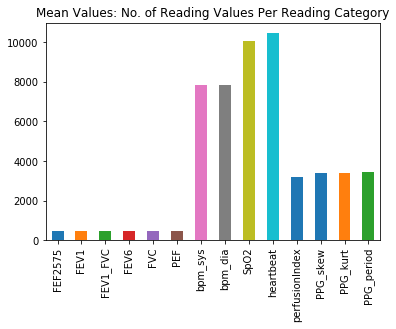

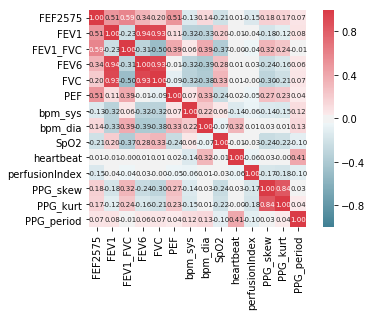

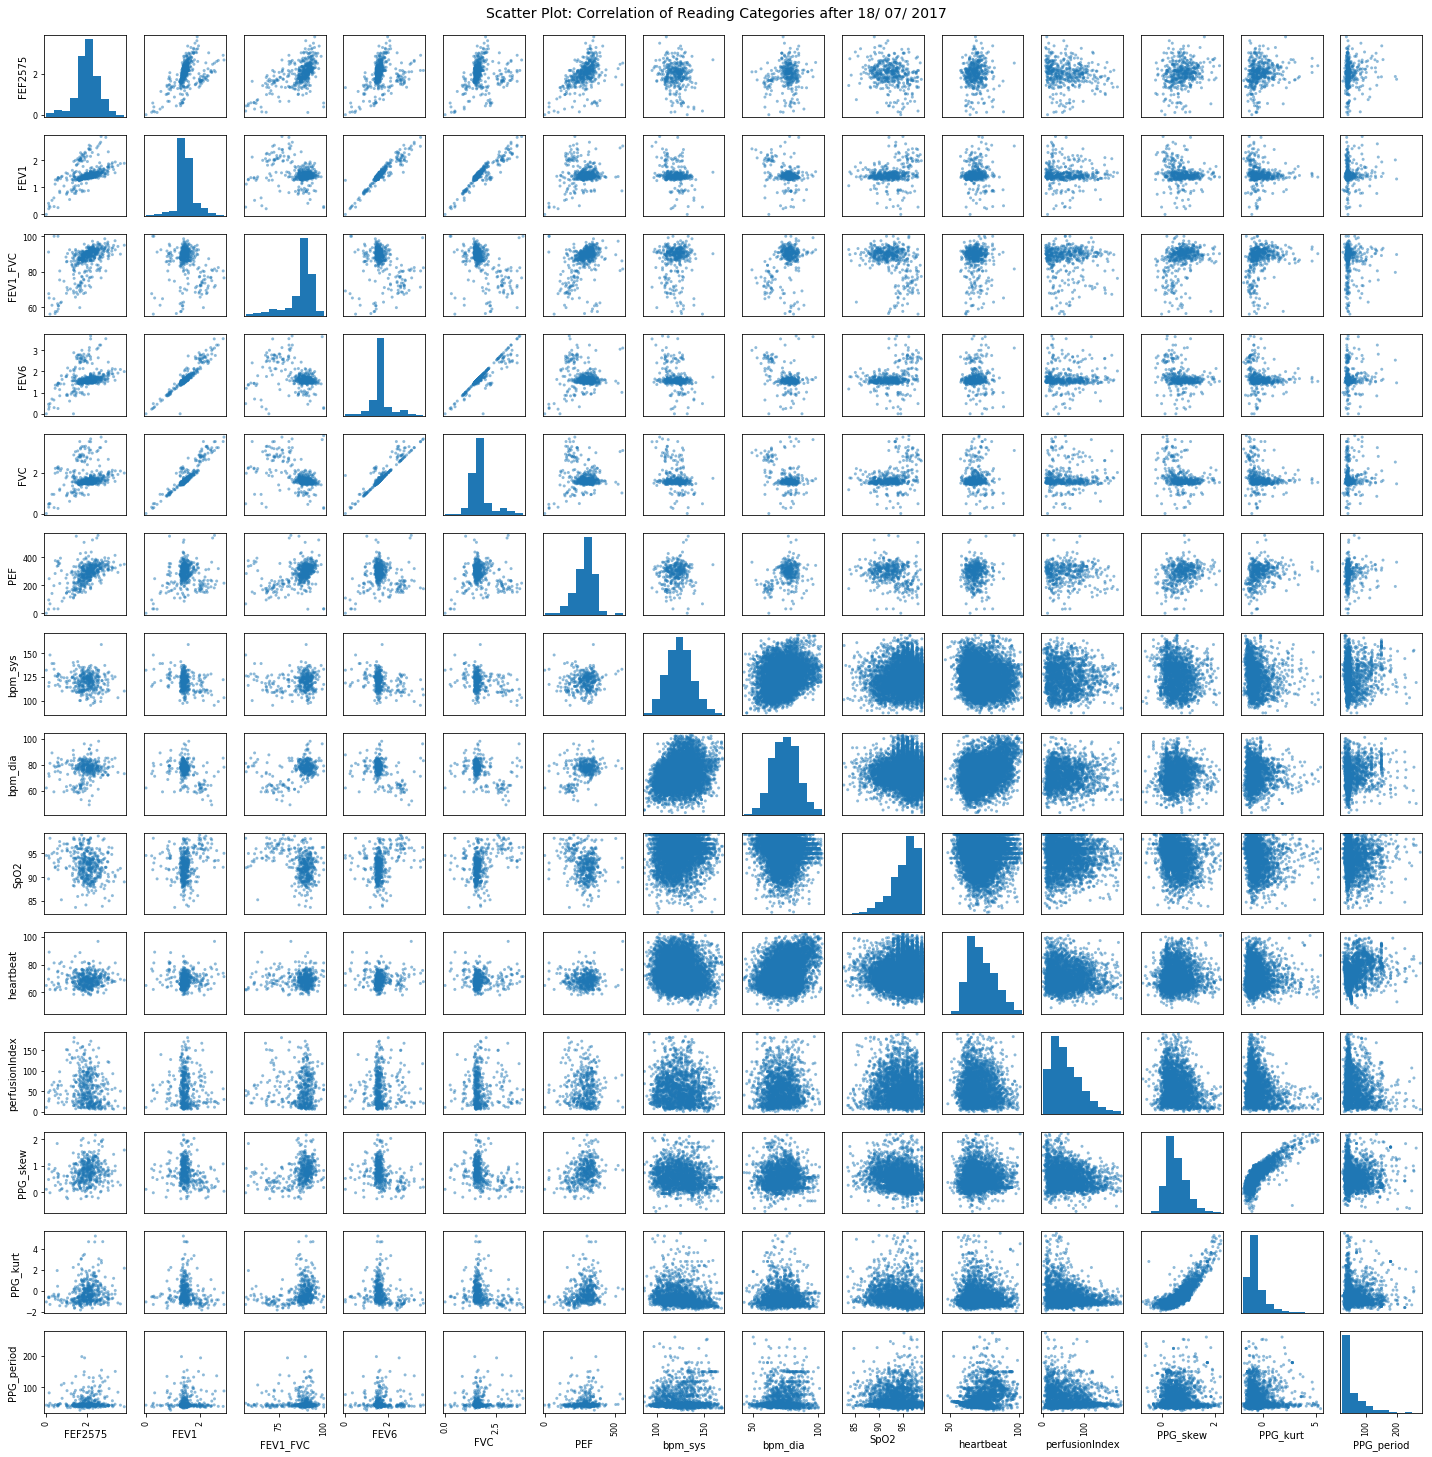

In [7]:
#Take the mean value per day for each pilot 
df3 = df.drop(columns=['TIME']).groupby(['PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE']).mean()

#Plot the number of values per day per reading category 
df3.count()
fig2 = df3.count().plot(legend=False, kind='bar', title='Mean Values: No. of Reading Values Per Reading Category')
fig2 = fig2.get_figure()
plt.savefig('patients/correlation/MeanReadingValuesPerReadingCategory.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()
df3.isna().sum()

#Plot the correlation between the values per day
corr3 = df3.corr()
sns_plot3 = sns.heatmap(corr3, mask=np.zeros_like(corr3, dtype=np.bool), annot=True, fmt='.2f', annot_kws={"size": 7}, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, vmin=-1, vmax=1)
#sns_plot3.set_title('Heatmap: Correlation of Reading Categories')
sns_plot3.figure.savefig('patients/correlation/Correlations_Heatmap.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()

#Plot the correlation in a scatter matrix between the values per day for the dataset after the first PPG measurement for each pilot
pd.plotting.scatter_matrix(df3, figsize=(20, 20))
plt.suptitle('Scatter Plot: Correlation of Reading Categories after 18/ 07/ 2017', fontsize=14, y=1.01)
plt.tight_layout()
plt.savefig('patients/correlation/Correlations_ScatterPlot.png', format='png', dpi=600)
plt.show()

In [8]:
#Remove pilot athens for clustering in good and bad day
df3.reset_index(inplace=True)
df3 = df3[~df3['CATEGORY'].isin(['Pilot Athens'])]
df3 = df3.groupby(['PATIENT_CODE', 'DATE', 'CATEGORY', 'GENDER', 'AGE']).mean()

In [9]:
# Use 15 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=15).fit_transform(df3)
df5 = pd.DataFrame(X_filled_knn, columns = df3.columns)
df5.index = df3.index
df5.reset_index(inplace=True)

NameError: name 'KNN' is not defined

In [ ]:
'''
#Replace the missing values by taking the mean value per column for each pilot
df3.reset_index(inplace=True)
for i in range(len(df['PATIENT_CODE'].unique())):
    df5 = df3[df3["PATIENT_CODE"] == df3['PATIENT_CODE'].unique()[i]]
    df5 = df5.fillna(df5.mean())
    df3[df3["PATIENT_CODE"] == df3['PATIENT_CODE'].unique()[i]] = df5
    print i
#Replace remaining Nan values with overal mean values
df3 = df3.fillna(df3.mean())
'''
'''
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True).fit_transform(df3)
df5 = pd.DataFrame(impute, columns = df3.columns)
df5.index = df3.index
df5.reset_index(inplace=True)
'''

In [ ]:
'''
#Check for outliers

#Normalize columns
dfdb = df5.drop(columns = ['PATIENT_CODE', 'CATEGORY', 'GENDER', 'AGE', 'DATE'])
dfdb = (dfdb - dfdb.mean()) / dfdb.std()

# Declaring DBSCAN Model to find outliers
dbscan = DBSCAN(eps=5, min_samples=1000)

# Fitting
clusters = dbscan.fit(dfdb)
len(set(clusters.labels_))
n_clusters_ = len(set(clusters.labels_)) - (1 if -1 in clusters.labels_ else 0)
n_noise_ = list(clusters.labels_).count(-1)
print n_clusters_, n_noise_

df5['CLASSES_dbscan'] = clusters.labels_
df3['CLASSES_dbscan'] = clusters.labels_
'''

In [ ]:
'''
# Transoring Using PCA for visualization
pca = PCA(n_components=2).fit(dfdb)
pca_2d = pca.transform(dfdb)

#Visualize outliers
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2], ['Normal', 'Outliers'])
plt.title('DBSCAN for outliers', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('patients/correlation/DBSCAN.svg', format='svg', dpi=600, bbox_inches = "tight")
plt.show()

#Remove outlier rows
df5 = df5[df5['CLASSES_dbscan'] != -1].drop(columns = ['CLASSES_dbscan'])
df3 = df3[df3['CLASSES_dbscan'] != -1].drop(columns = ['CLASSES_dbscan'])
'''

### Cluster to find good and bad days with kmeans

In [ ]:
#Cluster to find good and bad days with kmeans
#Normalize columns
df5 = df5.drop(columns  = ['PATIENT_CODE', 'CATEGORY', 'GENDER', 'DATE', 'AGE'])
df5_mean = df5.mean()
df5_std = df5.std()
df5 = (df5 - df5.mean()) / df5.std()

#Setup a kmeans classifier with 2 neighbors
kmeans = cluster.KMeans(2)

#Fit the model
kmeans.fit(df5)
cent = kmeans.cluster_centers_

#Set a new column with clustering results
df3['CLASSES_kmeans'] = kmeans.labels_

In [ ]:
#Defining TSNE Model for dimensionality reduction
model = TSNE(learning_rate=100)

#Fitting Model
transformed = model.fit_transform(df5)

#Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis, c=df3['CLASSES_kmeans'])
plt.title('t-SNE', fontsize=12)
plt.savefig('patients/clustering/TSNE_2.png', format='png', dpi=600, bbox_inches = "tight")
plt.show()

#Print centroids of two clusters
cent1 = (cent[0] * df5_std) + df5_mean
cent2 = (cent[1] * df5_std) + df5_mean
print cent1, '\n',  cent2

In [ ]:
#Write results
df3.reset_index(inplace=True)
df3.to_csv("patients/sunepeis_goodandbadDays.csv")
df.to_csv("patients/sunepeis_xoris_outliers.csv")

In [ ]:
'''
from datetime import date
dftmp = df3[df3.PATIENT_CODE == df3.PATIENT_CODE.unique()[2]]
dftmp.loc[(dftmp['DATE'] >= date(2018,07,01)) & (dftmp['DATE'] <= date(2018,7,31))].to_csv("patients/test_sunepeis_goodandbadDays.csv")
'''